In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mygrad.components as mc
import mygrad.functional as mf
from mygrad.losses import MeanSquareErrorLoss, LogCoshLoss
from mygrad.optimizers import SGD
from mygrad.preprocessors import MinMaxScaler, StandardScaler, IdentityScaler
from mygrad.dataloaders import NumpyRegressionDataloader
from mygrad.trainers import  Trainer as RegressionTrainer, ProgressBar, ParamInfoStore

/tmp/ipykernel_15934/4293185496.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Multimodal Large

In [2]:
train_df = pd.read_csv("../mio1/regression/multimodal-large-training.csv")
test_df = pd.read_csv("../mio1/regression/multimodal-large-test.csv")

In [3]:
X_train = train_df["x"].values
y_train = train_df["y"].values

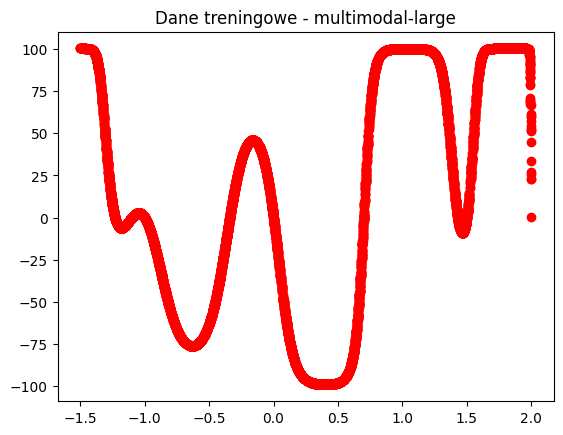

In [4]:
p = np.argsort(X_train)
plt.plot(X_train[p], y_train[p], "ro")
plt.title("Dane treningowe - multimodal-large")
plt.show()

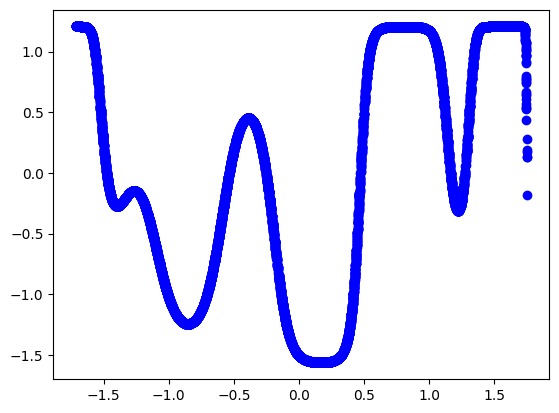

In [5]:
input_normalizer = StandardScaler()
output_normalizer = StandardScaler()

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_train_scaled = input_normalizer.fit_transform(X_train)
y_train_scaled = output_normalizer.fit_transform(y_train)

plt.plot(X_train_scaled[p, :], y_train_scaled[p, :], "bo")

In [6]:
len(X_train_scaled)

10000

In [46]:
model = mc.Sequential(
    mc.Linear(1, 50, init="xavier"),
    mc.Tanh(),
    mc.Linear(50, 50, init="xavier"),
    mc.Tanh(),
    mc.Linear(50, 50, init="xavier"),
    mc.Tanh(),
    mc.Linear(50, 1, init="uniform"),
)
optimizer = SGD(model.parameters(), learning_rate=0.02) 
loss = MeanSquareErrorLoss()
train_dataloader = NumpyRegressionDataloader(X_train_scaled, y_train_scaled, batch_size=20, shuffle=True)
info_store = ParamInfoStore(store_train_epochs_losses=True)
trainer = RegressionTrainer(model, optimizer, loss, train_dataloader, plugins=[ProgressBar(), info_store])
train_outputs = trainer.train(200)

Training epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Wyres funkcji kosztu w trakcje uczenia na multimodal-large\n SGD learning rate = 0.02 epochs = 200, batch size = 20\n przy inicjalizacji wag metodą xavier')

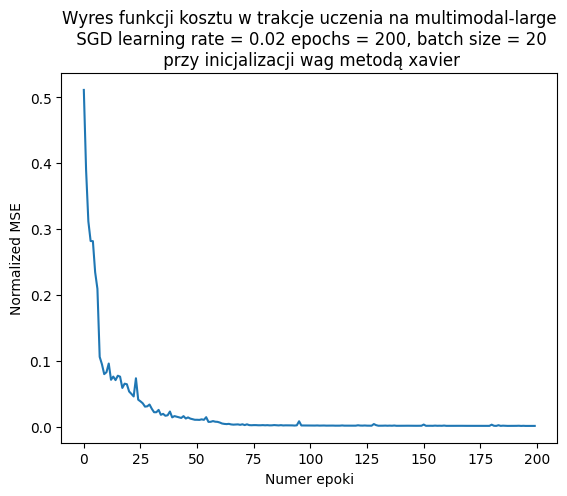

In [48]:
plt.plot(train_outputs["loss"])
plt.xlabel("Numer epoki")
plt.ylabel("Normalized MSE")
plt.title("Wyres funkcji kosztu w trakcje uczenia na multimodal-large\n SGD learning rate = 0.02 epochs = 200, batch size = 20\n przy inicjalizacji wag metodą xavier")

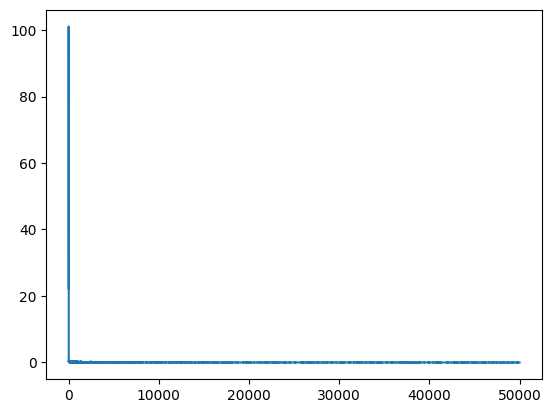

In [42]:
plt.plot(info_store.train_batch_losses)

/tmp/ipykernel_15934/2988704553.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse = float(mf.mse(output_normalizer.reverse(y_pred), y_train))


Text(0.5, 1.0, 'Wizualizacja predykcji na zbiorze treningowym')

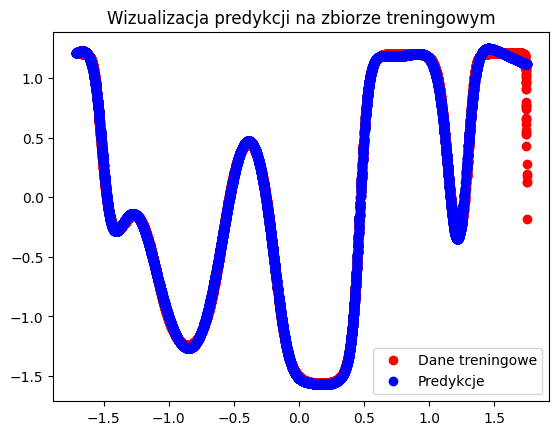

In [55]:
y_pred = model.forward(X_train_scaled)
plt.plot(X_train_scaled, y_train_scaled, "ro", label="Dane treningowe")
plt.plot(X_train_scaled, y_pred, "bo", label="Predykcje")
plt.legend()
mse = float(mf.mse(output_normalizer.reverse(y_pred), y_train))
plt.title(f"Wizualizacja predykcji na zbiorze treningowym")

/tmp/ipykernel_15934/2368704478.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse = float(mf.mse(y_pred, y_test))


Text(0.5, 1.0, 'Wizualizacja predykcji na zbiorze testowym. MSE: 3.32')

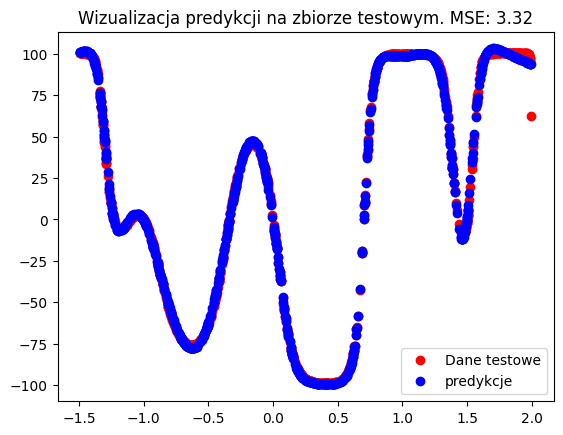

In [57]:
X_test = test_df["x"].values.reshape(-1, 1)
y_test = test_df["y"].values.reshape(-1, 1)

X_test_scaled = input_normalizer.transform(X_test)

y_pred_scaled = model.forward(X_test_scaled)
y_pred = output_normalizer.reverse(y_pred_scaled)

plt.plot(X_test, y_test, "ro", label="Dane testowe")
plt.plot(X_test, y_pred, "bo", label="predykcje")
mse = float(mf.mse(y_pred, y_test))
plt.legend()
plt.title(f"Wizualizacja predykcji na zbiorze testowym. MSE: {mse:.2f}")

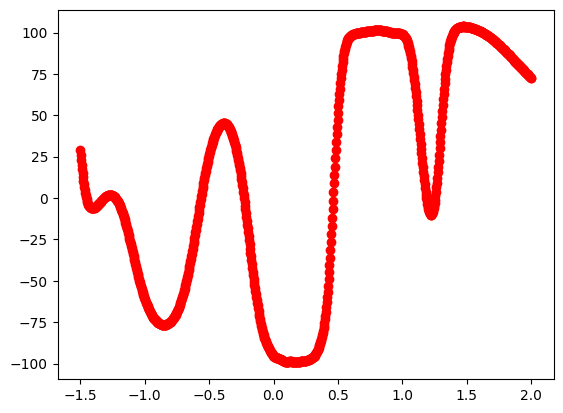

In [45]:
X_seq = np.linspace(-1.5, 2, 1000).reshape(-1, 1)
y_seq = model.forward(X_seq)
plt.plot(X_seq, output_normalizer.reverse(y_seq), "ro")